In [1]:
import numpy as np

## Задача 1  Точка на отрезке.

Допишите функцию, которая по числу $a \in [0,1]$ возвращает радиус-вектор $\vec{z}$ точки, расположенной на отрезке с концами радиус-векторов $\vec{x}$ и $\vec{y}$, такую что $|\vec{z} - \vec{x}| / |\vec{y} - \vec{x}| = a$. Все точки заданы радиус-векторами в n-мерном евклидовом пространстве, в виде массивов np.array.

In [2]:
def segment_point(x, y, a):
    '''Точка z на отрезке [x,y], такая что |x-z|/|x-y| = a'''
    z = x + a * (y - x)
    return z

x = np.array([0, 0, 0])
y = np.array([3, 3, 3])
print(segment_point(x, y, 1/3))

[1. 1. 1.]


## Задача 2 Угол между векторами.

Напишите функцию cos(n1, n2)  , которая вычисляет косинус угла между векторами в n-мерном евклидовом пространстве. Функция должна работать правильно независимо от того, подаются на вход векторы в виде списков или массивов numpy.

In [3]:
import numpy as np
def cos(n1, n2):
  n1, n2 = np.array(n1), np.array(n2)
  cs = np.dot(n1, n2) / (np.linalg.norm(n1) * np.linalg.norm(n2))
  return cs

n1 = np.array([1, 0])
n2 = [0.5, 0.5*(3**0.5)]
print(cos(n1,n2))

0.5000000000000001


## Задача 3  Нижне-треугольная матрица и матричная экспонента.

Создайте матрицу $A$ размера $32 \times 32$, задаваемую следующей формулой:
$$
A_{i j}=-\delta_{i, j}+\delta_{i, j+1}+\delta_{i, j+2}
$$
- Найдите спектр матрицы $A$. Выведите его на экран.
- Используя функцию scipy.linalg.expm, постройте $\left\|e^{A t}\right\|_{2}$ как функцию $t$ на интервале $0 \leq t \leq 50 .$ 

Спектр A: [-1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j
 -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j
 -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j
 -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j]


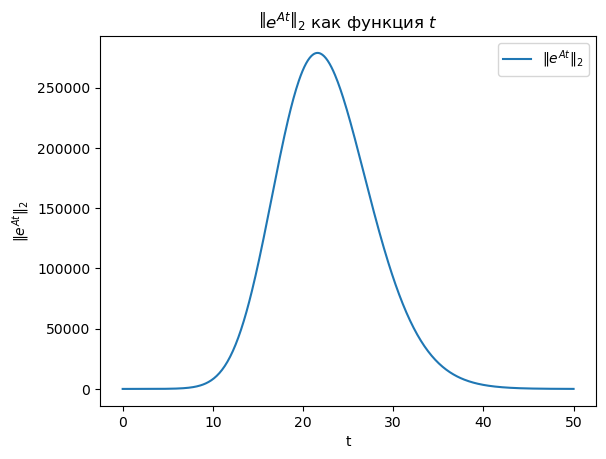

In [4]:
import numpy as np
from scipy.sparse import diags
import scipy.linalg
import matplotlib.pyplot as plt

from scipy.linalg import expm, eigvals

n = 32
main_diag = -np.ones(n)        
upper_diag_1 = np.ones(n - 1) 
upper_diag_2 = np.ones(n - 2)  

A = diags(
    diagonals=[main_diag, upper_diag_1, upper_diag_2], offsets=[0, 1, 2], shape=(n, n)).toarray() 

eigenvalues = eigvals(A)
print("Спектр A:", eigenvalues)

t_values = np.linspace(0, 50, 500)
norms = []

for t in t_values:
    exp_tA = expm(t * A)
    norm = np.linalg.norm(exp_tA, ord=2)
    norms.append(norm)

# Step 4: Plot the results
plt.plot(t_values, norms, label=r"$\|e^{At}\|_2$")
plt.xlabel("t")
plt.ylabel(r"$\|e^{At}\|_2$")
plt.title(r"$\left\|e^{A t}\right\|_{2}$ как функция $t$")
plt.legend()
plt.show()

## Задача 4  Плоскость и облако точек.

Скачайте файл, содержащий координаты облака точек в трехмерном пространстве, и распакуйте его с помощью numpy:
with np. load('data_distance_svd.npz') as data:
$$
x p, y p, z p=\text { data }\left[' x p^{\prime}\right], \text { data['yp'], data ['zp'] }
$$
Массивы содержат координаты точек: первая точка имеет координаты (хр [0], ур [0], zр [0] ), вторая точка - координаты $(\mathrm{xp}[1], \mathrm{yp}[1], \mathrm{zp}[1])$ и т.д. Нарисуйте точки на трехмерном графике. Можно заметить, что точки группируются вблизи некоторой плоскости. Задача состоит в том, чтобы построить данную плоскость. В качестве критерия выберем следующий: назовем наилучшей такую плоскость, что сумма квадратов ортогональных расстояний от точек до этой плоскости минимальна. Изобразите найденную плоскость на трёхмерном графике с облаком точек. 


Указание. Пусть плоскость с вектором нормали $\vec{n}$ проходит через точку с координатами $\vec{c}$. Тогда расстояние от точки $\vec{p}$ до плоскости дается скалярным произведением $\langle(\vec{p}-\vec{c}) \cdot \vec{n}\rangle .$ Таким образом, задача поиска наилучшей плоскости сводится к задаче наименьших квадратов относительно единичного вектора нормали $\vec{n}$.

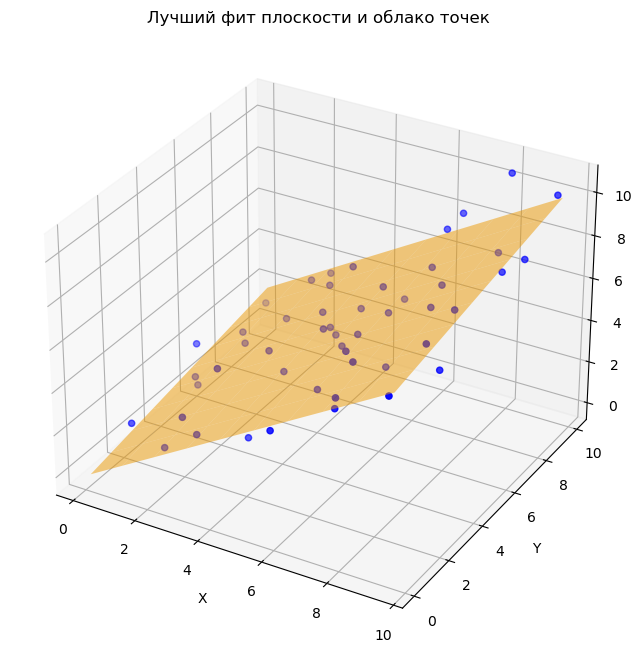

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

with np.load('data_distance_svd.npz') as data:
    xp, yp, zp = data['xp'], data['yp'], data['zp']

points = np.vstack((xp, yp, zp)).T

centroid = np.mean(points, axis=0)
centered_points = points - centroid

# SVD
U, S, Vt = np.linalg.svd(centered_points)

normal_vector = Vt[-1]

# Уравнение плоскости: normal_vector[0]*x + normal_vector[1]*y + normal_vector[2]*z = d
d = -centroid @ normal_vector

xx, yy = np.meshgrid(np.linspace(min(xp), max(xp), 10), np.linspace(min(yp), max(yp), 10))
zz = (-normal_vector[0] * xx - normal_vector[1] * yy - d) / normal_vector[2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xp, yp, zp, color='blue')
ax.plot_surface(xx, yy, zz, alpha=0.5, color='orange')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Лучший фит плоскости и облако точек')
plt.show()


##Задача 5 Вычисление погрешностей.

Рассмотрим два тела массами $M_{1}$ и $M_{2}$, расположенных на расстоянии $r$ друг от друга, Сила гравитационного взаимодействия между телами дается формулой
$$
F=\frac{G M_{1} M_{2}}{r^{2}}
$$ 

где $G$ - гравитационная постоянная, значение которой считаем известным точно.
Предположим, что значения масс известны с погрешностями измерений:
$$
\begin{aligned}
&M_{1}=40 \times 10^{4} \pm 0.05 \times 10^{4} \mathrm{~kg} \\
&M_{2}=30 \times 10^{4} \pm 0.1 \times 10^{4} \mathrm{~kg}
\end{aligned}
$$
и $r=3.2 \pm 0.01 \mathrm{~m}$.

(a) Используя стандартные правила вычисления погрешностей, вычислите значение и погрешность силы взаимодействия $F$.

(b) Синтетический набор данных: будем интерпретировать заданное значение с погрешностью как нормальное распределение с заданным средним и стандартным отклонением. Сгенерируйте $10^{5}$ случайных значений каждого из параметров $\left(M_{1}, M_{2}\right.$ и $r$ ), согласно заданным значениям. Для каждого набора реализаций вычислите значение гравитационной силы.

(с) Постройте гистограмму (plt.hist) значений силы и график нормального распределения со средним и дисперсией из предыдущего пункта. (Результаты должны получиться согласованными).

(d) Повторите задание для следующего набора данных:
$$
\begin{aligned}
M_{1} &=40 \times 10^{4} \pm 2 \times 10^{4} \mathrm{~kg} \\
M_{2} &=30 \times 10^{4} \pm 10 \times 10^{4} \mathrm{~kg} \\
r &=3.2 \pm 1.0 \mathrm{~m}
\end{aligned}
$$

Объясните одним предложением, почему гистограмма такая странная.


### (a)

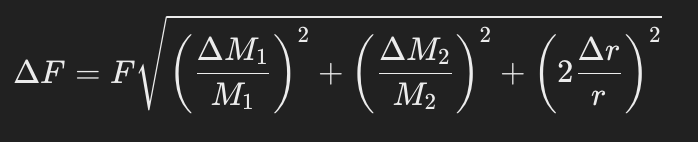

In [10]:
G = 6.674e-11 

M1 = 40e4  # kg
dM1 = 0.05e4  # kg
M2 = 30e4  # kg
dM2 = 0.1e4  # kg
r = 3.2  # m
dr = 0.01  # m

F = G * M1 * M2 / r**2
relative_error = np.sqrt((dM1 / M1)**2 + (dM2 / M2)**2 + (2 * dr / r)**2)
dF = F * relative_error

print(f"F = {F:.2e} ± {dF:.2e} N")


F = 7.82e-01 ± 5.63e-03 N


### (b)

In [30]:
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.stats import norm

def raschet(M1, M2, r, dM1, dM2, dr):
    num_samples = int(1e5)

    M1_samples = np.random.normal(M1, dM1, num_samples)
    M2_samples = np.random.normal(M2, dM2, num_samples)
    r_samples = np.random.normal(r, dr, num_samples)

    F_samples = G * M1_samples * M2_samples / r_samples**2

    mean_F = np.mean(F_samples)
    std_F = np.std(F_samples)

    plt.figure(figsize=(10, 6))
    plt.hist(F_samples, bins=100, density=True, alpha=0.6, color='blue', label='Сгенерированные данные')

    # Overlay normal distribution
    x = np.linspace(mean_F - 4*std_F, mean_F + 4*std_F, 1000)
    plt.plot(x, norm.pdf(x, mean_F, std_F), 'r-', lw=2, label='Нормальное распределение')
    plt.title('Гистограмма для F')
    plt.xlabel('Сила (N)')
    plt.xlim([mean_F - 4*std_F, mean_F + 4*std_F])
    plt.ylabel('Плотность распределения')
    plt.legend()
    plt.show()
    return mean_F, std_F

### (c)

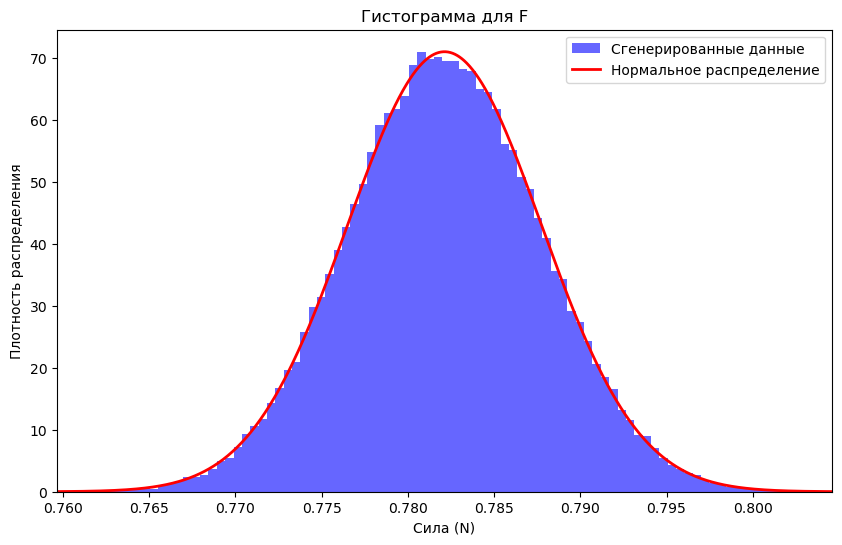

(0.7821248653827511, 0.0056179060214672505)


In [31]:
M1 = 40e4  # kg
dM1 = 0.05e4  # kg
M2 = 30e4  # kg
dM2 = 0.1e4  # kg
r = 3.2  # m
dr = 0.01 # m
print(raschet(M1, M2, r, dM1, dM2, dr))

### (d)

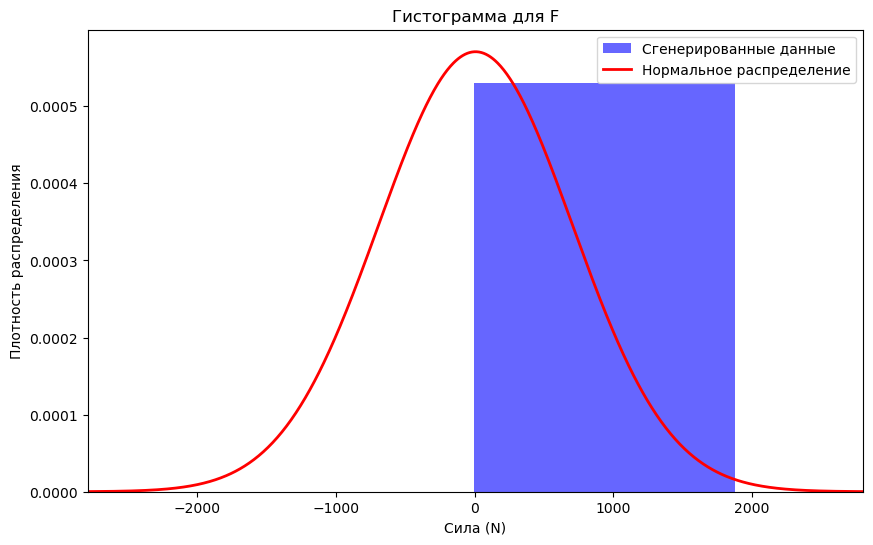

(7.391599718461782, 698.9222462680493)


In [32]:
M1 = 40e4  # kg
dM1 = 2e4  # kg
M2 = 30e4  # kg
dM2 = 10e4  # kg
r = 3.2  # m
dr = 1 # m
print(raschet(M1, M2, r, dM1, dM2, dr))

График получился таким странным, потому что второй сценарий предполагает большую погрешность в r

Поскольку F обратно пропорционален r^2, погрешность в r создает распределение негауссово распределение

Этот эффект доминирует из-за квадратичной чувствительности к r^2